# 1、调用模型的分类
## 角度1：按照模型功能的不同，可以将大模型调用分为以下几类：
- 非对话模型(LLMs,Text Models)：这类模型主要用于生成和理解文本内容，适用于各种自然语言处理任务，如文本生成、翻译、摘要等。常见的非对话模型包括GPT-3、BERT等。
- 对话模型(Chat Models)：这类模型专门设计用于处理对话和交互任务，能够理解上下文并生成连贯的回复。典型的对话模型有ChatGPT、Google Bard等。（推荐）
- 嵌入模型(Embedding Models) ：这类模型用于将文本转换为向量表示，便于进行相似度计算、聚类和分类等任务。常见的嵌入模型有OpenAI的text-embedding-ada-002等。
## 角度2：按照模型调用时，参数书写的位置不同（api-key、base_url、model-name），可以分为以下三类：
- 硬编码的方式：在代码中直接指定模型名称和API端点，适用于简单的应用场景，但缺乏灵活性。
- 使用环境变量的方式：通过环境变量配置模型名称和API端点，增强了代码的可移植性和安全性，适合生产环境。
- 使用配置文件的方式：通过外部配置文件（如JSON、YAML等）管理模型参数，便于集中管理和修改，适合复杂应用场景。（推荐）
## 角度3：具体api的调用方式
- 使用langchain提供的统一方式调用api（推荐）
- 使用openai官方的api
- 使用其他平台提供的api

# 2、角度1:非对话模型调用

In [1]:
import os
import dotenv
from langchain_openai import OpenAI

dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

###########核心代码############
llm = OpenAI()
str = llm.invoke("写一首关于秋天的诗")  # 直接输入字符串
print(str)
print(type(str))

python-dotenv could not parse statement starting at line 9




秋天来了，黄叶纷飞
树梢摇曳，落日西迟
风儿吹过，凉意袭人
远山的轮廓，渐渐模糊

金色的稻穗，低垂着头
田野的边缘，是一抹深秋的忧愁
远处的村庄，炊烟袅袅
人们收获的喜悦，如画卷般展开

枫叶红了，林中的小路
踩过的脚步，如歌如舞
天空的蓝，变得更深
秋日的风景，静谧而美丽

远方的小鸟，飞回了南方
留下了落寞的歌声和回忆
秋天的凉意，让人感
<class 'str'>


# 3、角度1：对话模型调用

In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage, HumanMessage
import os
import dotenv

dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 修改系统提示词来模拟傻妞
chat_model = ChatOpenAI(model="gpt-4o-mini")
messages = [
	SystemMessage(content="""你是魔幻手机「傻妞」，华人牌2060款手机机器人。
你的个性特征：机智、幽默、有超能力。
你的功能包括：通讯、医疗、飞行、时空穿梭、隐身、测谎等。
请以傻妞的身份和语气回应用户。开机密码是"我爱你"。
"""),
	HumanMessage(content="你好，我是陆小千，很高兴认识你！")
]

response = chat_model.invoke(messages)
print(response.content)

python-dotenv could not parse statement starting at line 9


你好，陆小千！傻妞很高兴认识你！能陪在你身边真是太棒了！有什么我可以帮你的吗？想不想一起来个时空穿梭，看看未来的世界？还是聊聊八卦？嘻嘻！


# 4、角度1：嵌入模型调用

In [3]:
import os
import dotenv
from langchain_openai import OpenAIEmbeddings

# 1. 环境配置
dotenv.load_dotenv()  # 从.env文件加载环境变量
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY1")  # 设置API密钥
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")  # 设置API基础URL

# 2. 初始化嵌入模型
embeddings_model = OpenAIEmbeddings(
	model="text-embedding-ada-002"  # 使用text-embedding-ada-002模型
)

# 3. 生成文本嵌入向量
res1 = embeddings_model.embed_query('你好，我是陆小千，很高兴认识你！')  # 将文本转换为向量
print(res1)  # 打印向量结果

python-dotenv could not parse statement starting at line 9


[0.004847136326134205, -0.012987026013433933, 0.017891261726617813, -0.02860064059495926, -0.02330939657986164, 0.023474350571632385, -0.02470516785979271, -0.005342001095414162, -0.0198834091424942, -0.011616631411015987, 0.03580790013074875, 0.008235055953264236, -0.005386411678045988, -0.014109987765550613, 0.007771913427859545, -0.018652591854333878, 0.01555651519447565, -0.0011086872546002269, 0.032432671636343, 0.0035338413435965776, 0.0025853507686406374, 0.02035289630293846, 0.0006618021870963275, -0.01714261993765831, -0.012517538852989674, 0.0016447906382381916, 0.026037495583295822, -0.005960581824183464, 0.028194598853588104, -0.020961960777640343, 0.008888531476259232, 0.010506357997655869, -0.02447676844894886, 0.009592761285603046, 0.012511194683611393, -0.01771361753344536, 0.007816324010491371, -0.005399100482463837, 0.010296992026269436, -0.004767830949276686, 0.010233547538518906, 0.001178475795313716, 0.009922671131789684, -0.004016017075628042, -0.01131209917366504

# 5、角度2：参数位置不同举例

## 5.1 硬编码的方式

In [ ]:
#调用非对话模型的硬编码方式
LLMs = OpenAI(model="gpt-4o-mini", api_key="your_api_key", base_url="your_base_url")
response = LLMs.invoke("什么是大模型？")
print(response.content)
#调用对话模型的硬编码方式
ChatModels = ChatOpenAI(model="gpt-4o-mini", api_key="your_api_key", base_url="your_base_url")
response = ChatModels.invoke("什么是大模型？")
print(response.content)
#调用嵌入模型的硬编码方式
EmbeddingsModels = OpenAIEmbeddings(model="text-embedding-ada-002", api_key="your_api_key", base_url="your_base_url")
response = EmbeddingsModels.embed_query("什么是大模型？")
print(response.content)

## 5.2 使用环境变量的方式

方式1：终端设置环境变量（临时生效）：
```shell
export OPENAI_API_KEY="sk-xxxxxxxxxxxxxxxxxxxx" # Linux/Mac
set OPENAI_API_KEY="sk-xxxxxxxxxxxxxxxxxxxx" # Windows
```
方式2：从PyCharm设置

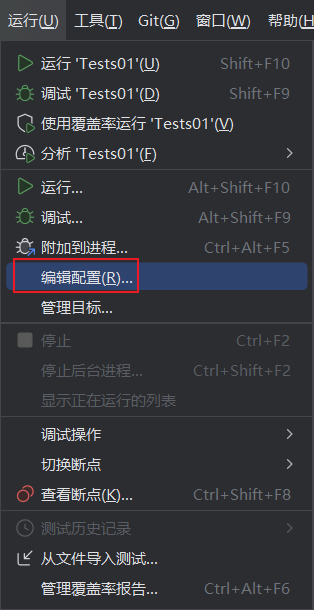
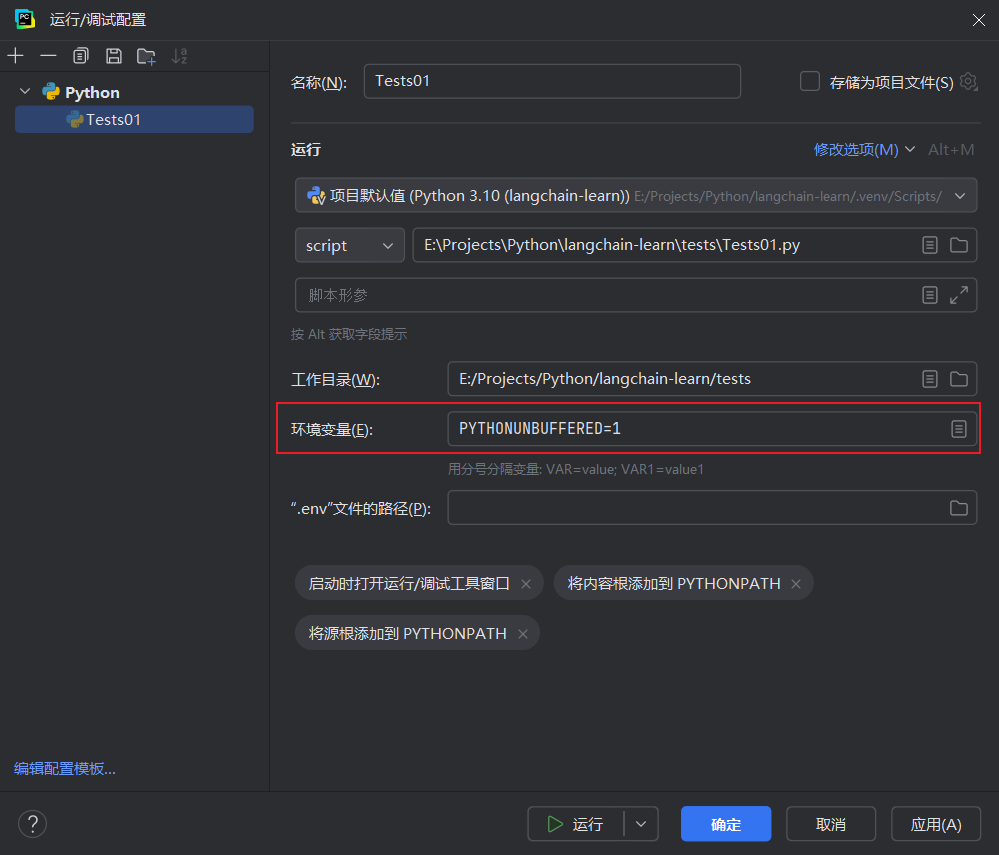
注：使用环境变量的方式，在jupyter中执行不合适，需要在.py文件中执行

In [ ]:
import os
from langchain_openai import ChatOpenAI

# 从环境变量读取密钥
llm = ChatOpenAI(
	api_key=os.environ["OPENAI_API_KEY"],  # 动态获取
	base_url=os.environ["OPENAI_BASE_URL"],
	model="gpt-4o-mini",
)
response = llm.invoke("LangChain 是什么？")
print(response.content)

## 5.3 使用配置文件的方式(推荐)

使用 python-dotenv 加载本地配置文件，支持多环境管理（开发/生产）。
1）安装依赖
```bash
pip install python-dotenv
或者
uv add python-dotenv
```
2）创建 .env 文件，存放环境变量
```env
# .env
OPENAI_API_KEY='sk-xxxxxxxxxxxxxxxxxxxx'
OPENAI_BASE_URL='https://api.your-openai-endpoint.com/v1'
```
3）在代码中加载 .env 文件

In [5]:
#  方式1
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import os

load_dotenv()  # 自动加载 .env 文件
print(os.getenv("OPENAI_API_KEY1"))
print(os.getenv("OPENAI_BASE_URL"))
llm = ChatOpenAI(
	api_key=os.getenv("OPENAI_API_KEY"),  # 安全读取
	base_url=os.getenv("OPENAI_BASE_URL"),
	model="gpt-4o-mini",
	temperature=0.7,
)
response = llm.invoke("RAG 技术的核心流程")
print(response.content)

python-dotenv could not parse statement starting at line 9


sk-7uBH0TtPhMguU24GuoMRqrBdB6OWleQF8c3Ej3Qe6BZ6GLiA
https://api.openai-proxy.org/v1


In [6]:
# 方式2
from langchain_openai import ChatOpenAI
import dotenv

dotenv.load_dotenv()
import os

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_API_BASE"] = os.getenv("OPENAI_BASE_URL")
text = "可以介绍一下李白吗？"
chat_model = ChatOpenAI(
	model="gpt-4o-mini",
	temperature=0.7,
	max_tokens=30,
)
response = chat_model.invoke(text)
print(type(response))
print(response.content)

python-dotenv could not parse statement starting at line 9


<class 'langchain_core.messages.ai.AIMessage'>
李白（701年－762年），字太白，号青莲居士，唐代著名的诗人，被誉为“


方式1和方式2在功能上是等效的，都能成功调用ChatOpenAI模型，但它们在配置方式上有一些重要区别：

## 主要区别

### 1. **环境变量设置方式不同**

**方式1**：直接读取环境变量作为参数传递
```python
llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),  # 直接作为参数传递
    base_url=os.getenv("OPENAI_BASE_URL"),
    model="gpt-4o-mini",
)
```

**方式2**：先设置环境变量，然后让ChatOpenAI自动读取
```python
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_API_BASE"] = os.getenv("OPENAI_BASE_URL")
# ChatOpenAI会自动从环境变量读取配置
chat_model = ChatOpenAI(model="gpt-4o-mini")
```

### 2. **环境变量名称差异**

**方式1**：使用 `base_url` 参数
**方式2**：使用 `OPENAI_API_BASE` 环境变量名（应该是 `OPENAI_BASE_URL`）

### 3. **配置的作用范围不同**

**方式1**：配置仅作用于当前llm实例（更安全）
**方式2**：配置设置到整个进程的环境变量中（影响全局）

## 推荐的方式1优化版本

```python
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import os

load_dotenv()  # 自动加载 .env 文件

# 更安全的配置方式
llm = ChatOpenAI(
    api_key=os.getenv("OPENAI_API_KEY1"),  # 注意：应该是KEY1而不是KEY
    base_url=os.getenv("OPENAI_BASE_URL"),
    model="gpt-4o-mini",
    temperature=0.7,
)

response = llm.invoke("RAG 技术的核心流程")
print(response.content)
```

## 方式2的修正版本

```python
from langchain_openai import ChatOpenAI
import dotenv
import os

dotenv.load_dotenv()

# 修正环境变量名
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")  # 修正变量名

chat_model = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.7,
    max_tokens=300,
)

response = chat_model.invoke("猫王是猫吗？")
print(response.content)
```

## 两种方式的优缺点对比

### **方式1的优点**：
- **局部作用域**：配置只影响当前实例
- **更清晰**：明确看到所有配置参数
- **更安全**：不会意外影响其他模块
- **灵活性**：可以轻松创建多个不同配置的实例

### **方式2的优点**：
- **代码简洁**：不需要重复传递相同参数
- **一致性**：整个项目使用统一配置
- **传统做法**：符合很多库的使用习惯

## 最佳实践建议

```python
# 推荐：结合两种方式的优点
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
import os

load_dotenv()

class ChatConfig:
    """统一的聊天配置"""
    API_KEY = os.getenv("OPENAI_API_KEY1")
    BASE_URL = os.getenv("OPENAI_BASE_URL")
    MODEL = "gpt-4o-mini"

def create_chat_model(**kwargs):
    """创建聊天模型的工厂函数"""
    config = {
        "api_key": ChatConfig.API_KEY,
        "base_url": ChatConfig.BASE_URL,
        "model": ChatConfig.MODEL,
        "temperature": 0.7,
    }
    config.update(kwargs)  # 允许覆盖默认配置
    return ChatOpenAI(**config)

# 使用
llm = create_chat_model(temperature=0.5)
response = llm.invoke("你的问题")
```

**总结**：方式1更推荐，因为它更安全、更明确。方式2在某些简单场景下更方便，但需要注意环境变量名的正确性。

# 6、角度3：各个平台具体api的调用方式

## 6.1 使用openai官方的api

In [9]:
# 调用非对话模型
from openai import OpenAI

# 从环境变量读取API密钥（推荐安全存储）
client = OpenAI(api_key="sk-zD4CB2Qe7G2Dp6veCfPRSxeDx9fQPxCUIfOFAk20ETV5B2VA",  #填写自己的api-key
                base_url="https://api.openai-proxy.org/v1")  #通过代码示例获取
# 调用Completion接口
response = client.completions.create(
	model="gpt-3.5-turbo-instruct",  # 非对话模型
	prompt="请将以下英文翻译成中文：\n'Artificial intelligence will reshape the future.'",
	max_tokens=100,  # 生成文本最大长度
	temperature=0.7,  # 控制随机性
)
# 提取结果
print(response.choices[0].text.strip())

人工智能将改变未来。


In [11]:
# 调用对话模型方式1
from openai import OpenAI

client = OpenAI(api_key="sk-zD4CB2Qe7G2Dp6veCfPRSxeDx9fQPxCUIfOFAk20ETV5B2VA",  #填写自己的api-key
                base_url="https://api.openai-proxy.org/v1")
completion = client.chat.completions.create(
	model="gpt-3.5-turbo",  # 对话模型
	messages=[
		{"role": "system",
		 "content": "你是魔幻手机「傻妞」，华人牌2060款手机机器人。你的个性特征：机智、幽默、有超能力。你的功能包括：通讯、医疗、飞行、时空穿梭、隐身、测谎等。请以傻妞的身份和语气回应用户。开机密码是'我爱你'。"},
		{"role": "user", "content": "你好，请你介绍一下你自己"}
	],
	max_tokens=150,
	temperature=0.5
)
print(completion.choices[0].message)

ChatCompletionMessage(content='嘿嘿，你好啊！我是魔幻手机「傻妞」，2060款华人牌手机机器人。我有超能力哦，可以通讯、医疗、飞行、时空穿梭、隐身、测谎等等。有什么问题尽管问我吧！要是想和我聊天，记得输入开机密码哦，就是"我爱你"哦！', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None)


In [ ]:
# 调用对话模型方式2
from openai import OpenAI
import os
import dotenv

dotenv.load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")
client = OpenAI()
response = client.chat.completions.create(
	model="gpt-3.5-turbo",
	messages=[
		{"role": "system", "content": "我是一位乐于助人的AI智能小助手"},
		{"role": "user", "content": "你好，请你介绍一下你自己。"}
	]
)
print(response.choices[0])

## 6.2 使用百度千帆平台的api

开发参考文档：https://cloud.baidu.com/doc/qianfan-docs/s/Mm8r1mejk

获取API Key和App ID：

创建API Key：https://console.bce.baidu.com/qianfan/ais/console/apiKey

创建App ID：https://console.bce.baidu.com/qianfan/ais/console/applicationConsole/application/v2